In [1]:
import polar

```python:polar.py
#!/usr/bin/env python
"""polar plot functions"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def _polarplot(df, **kwargs):
    """polar plot
    usage: df.polarplot()

    Same args with `df.plot()`
    """
    _df = df.copy()
    _df.index = _df.index * np.pi / 180  # Convert radian
    ax = plt.subplot(111, projection='polar')  # Polar plot
    ax = _df.plot(ax=ax, **kwargs)
    return ax


def _mirror(self, ccw=True):
    """Make a mirror copy of DataFrame with respect to the line
    usage:
        df.mirror(ccw=True)...data increase to Counter Clock Wise(ccw)
        df.mirror(ccw=False)...data increase to Clock Wise(cw)
    args: ccw(bool) default True
    return: pandas.Series or pandas.DataFrame
    """
    copy_index = self.index
    if ccw:  # data increase to Counter Clock Wise(ccw)
        mirror_df = self.append(self.iloc[-2::-1], ignore_index=True)
        new_index = np.r_[copy_index, copy_index[1:] + copy_index[-1]]
    else:  # data increase to Clock Wise(cw)
        mirror_df = self.iloc[::-1].append(self.iloc[1:], ignore_index=True)
        new_index = np.r_[copy_index[::-1], -copy_index[1:]]
    mirror_df.index = new_index  # reset index
    return mirror_df


# Use as pandas methods
for cls in (pd.DataFrame, pd.Series):
    setattr(cls, 'mirror', _mirror)
    setattr(cls, 'polarplot', _polarplot)
```

# Seriesで極座標プロット

## サンプルデータ
10°刻みで0°から90°までランダムな値が入ったデータを用意します。
以下では断りがない限り、indexの単位はすべて度数法に準じた"°(度)"です。

In [2]:
np.random.seed(6)  # ランダムステート固定
index = range(0,190,10)
sr = pd.Series(np.random.randn(len(index)), index=index); sr

0     -0.311784
10     0.729004
20     0.217821
30    -0.899092
40    -2.486781
50     0.913252
60     1.127064
70    -1.514093
80     1.639291
90    -0.429894
100    2.631281
110    0.601822
120   -0.335882
130    1.237738
140    0.111128
150    0.129151
160    0.076128
170   -0.155128
180    0.634225
dtype: float64

## 極座標プロット
`polarplot()`メソッドでサンプルデータを極座標にプロットします。

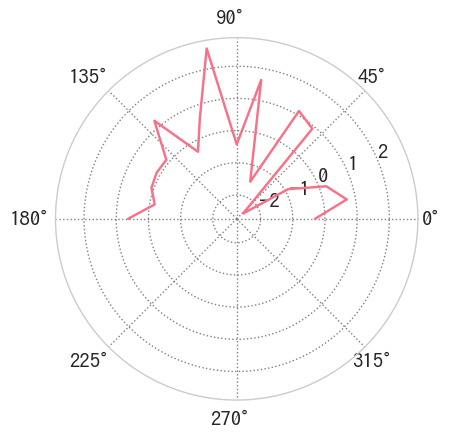

In [3]:
sr.polarplot()

```python:polarplot.py
def _polarplot(df, **kwargs):
    _df = df.copy()  # 元のデータフレームを壊さないようにコピー
    _df.index = _df.index * np.pi / 180  # ラジアン変換
    ax = plt.subplot(111, projection='polar')  # 極座標プロット
    ax = _df.plot(ax=ax, kind='line', **kwargs)  # **kwargsでdf.plotと同じ引数使える
    return ax
```

`polarplot()`メソッドは引数にデータフレーム(またはシリーズ)を要求して、戻り値はグラフaxです。
`**kwargs`引数で、`df.plot()`と同じ引数が使えます。

pandasのメソッドとして使えるように、ファイルの一番下で`setattr(pd.DataFrame, 'polarplot', _polarplot)`としてあるので、`df.polarplot()`として呼び出せます。

`pd.DataFrame.polarplot = _polarplot`とすることと同じです。自作の関数を既存クラスのメソッドとして扱えるようにする私の常套手段です。

## 鏡像データを作成
`mirror()`メソッドで、鏡像データを作り出します。

データの中身は次に示すように360°方向に増えます。

In [6]:
sr.mirror()

0     -0.311784
10     0.729004
20     0.217821
30    -0.899092
40    -2.486781
50     0.913252
60     1.127064
70    -1.514093
80     1.639291
90    -0.429894
100    2.631281
110    0.601822
120   -0.335882
130    1.237738
140    0.111128
150    0.129151
160    0.076128
170   -0.155128
180    0.634225
190   -0.155128
200    0.076128
210    0.129151
220    0.111128
230    1.237738
240   -0.335882
250    0.601822
260    2.631281
270   -0.429894
280    1.639291
290   -1.514093
300    1.127064
310    0.913252
320   -2.486781
330   -0.899092
340    0.217821
350    0.729004
360   -0.311784
dtype: float64

```python:mirror.py
def _mirror(self, ccw=True):
    copy_index = self.index
    if ccw:  # data increase to Counter Clock Wise(ccw)
        mirror_df = self.append(self.iloc[-2::-1], ignore_index=True)
        new_index = np.r_[copy_index, copy_index[1:] + copy_index[-1]]
    else:  # data increase to Clock Wise(cw)
        mirror_df = self.iloc[::-1].append(self.iloc[1:], ignore_index=True)
        new_index = np.r_[copy_index[::-1], -copy_index[1:]]
    mirror_df.index = new_index  # reset index
    return mirror_df
```

引数無し、または`ccw=True`で`mirror()`メソッドを呼ぶと、反時計回りにデータをコピーして、インデックスを振り直します。
引数`ccw=False`で`mirror()`メソッドを呼ぶと、時計回りにデータをコピーして、インデックスを振り直します。

mirror化したシリーズをプロットします。

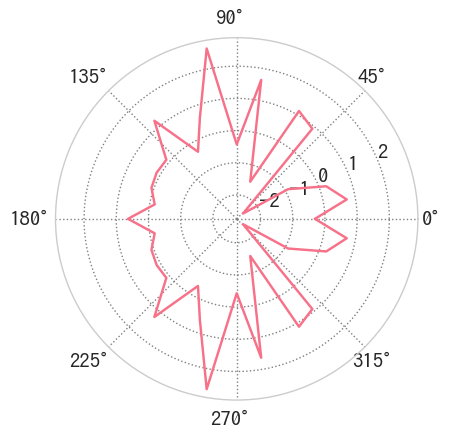

In [108]:
sr.mirror().polarplot()

# DataFrameで極座標プロット

## sin波cos波サンプルデータ
次に、DataFrame型で極座標プロットを行います。
sin波, cos波を$\pi$/2だけとったサンプルデータを作成します。

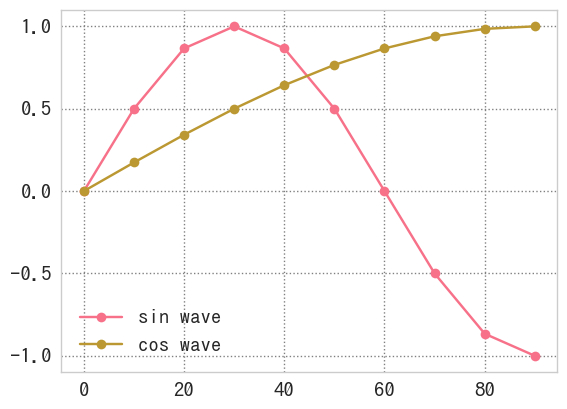

In [76]:
index = np.arange(0,100,10)
df = pd.DataFrame({'sin wave':np.sin(3*index*np.pi/180),
                   'cos wave':np.sin(index*np.pi/180)}, index=index)
df.plot(style='o-')

## polarplotの引数指定

極座標プロットするために`polarplot()`メソッドを使用します。
`polarplot()`メソッドの引数には`df.plot(**kwargs)`として使えるほぼすべての引数が使えます。

例えば以下のようにして`style='.'`としてあげると、点でプロットされます。
`ms=<数字>`としてあげると、marker sizeを変更してくれます。

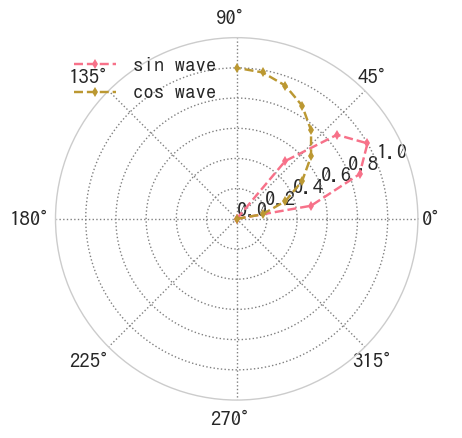

In [77]:
df.polarplot(style='d--', ms=5, ylim=[0,1.2], yticks=np.arange(0,1.2,.2))

時計回りに鏡像を作成します。

In [78]:
df.mirror()

,sin wave,cos wave
0,0.000000e+00,0.000000
10,5.000000e-01,0.173648
20,8.660254e-01,0.342020
30,1.000000e+00,0.500000
40,8.660254e-01,0.642788
50,5.000000e-01,0.766044
60,1.224647e-16,0.866025
70,-5.000000e-01,0.939693
80,-8.660254e-01,0.984808
90,-1.000000e+00,1.000000


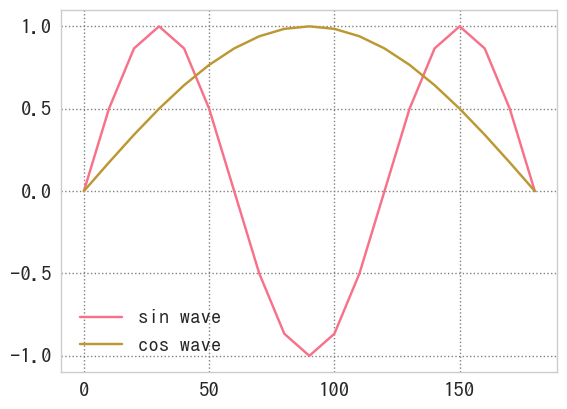

In [79]:
df.mirror().plot()

極座標プロットでは判例が間違いなくグラフの円の中に含まれて重なって見づらいので、凡例を外側に置くように`plt.legend()`で凡例の位置を指定したほうが良いです。

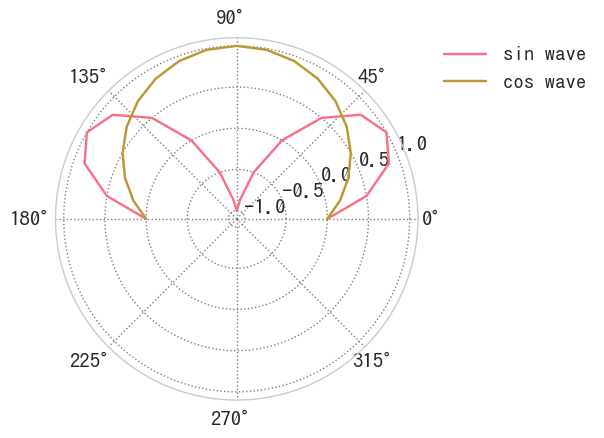

In [80]:
df.mirror().polarplot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)  # 凡例外側

ミラー化した後のデータフレームは次のようになっています。

In [81]:
df.mirror()

,sin wave,cos wave
0,0.000000e+00,0.000000
10,5.000000e-01,0.173648
20,8.660254e-01,0.342020
30,1.000000e+00,0.500000
40,8.660254e-01,0.642788
50,5.000000e-01,0.766044
60,1.224647e-16,0.866025
70,-5.000000e-01,0.939693
80,-8.660254e-01,0.984808
90,-1.000000e+00,1.000000


1周(360度)までデータを拡張するには`mirror()`メソッドを2回続けて打って下さい。

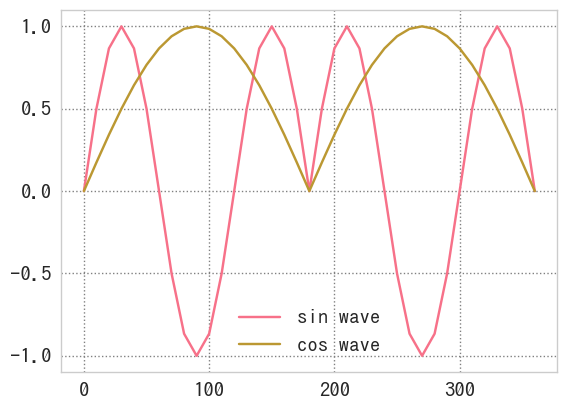

In [101]:
df.mirror().mirror().plot()

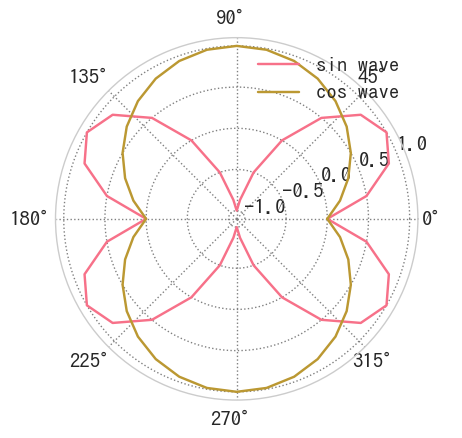

In [102]:
df.mirror().mirror().polarplot()

In [103]:
df.mirror().mirror()

,sin wave,cos wave
0,0.000000e+00,0.000000
10,5.000000e-01,0.173648
20,8.660254e-01,0.342020
30,1.000000e+00,0.500000
40,8.660254e-01,0.642788
50,5.000000e-01,0.766044
60,1.224647e-16,0.866025
70,-5.000000e-01,0.939693
80,-8.660254e-01,0.984808
90,-1.000000e+00,1.000000


## CCW(反時計回り)
`mirror()`メソッドの引数は`cw`(Cloce Wise 時計回り)のみで、デフォルトは`True`です。
`mirror(False)`のようにしてメソッドの引数を指定すると`cw`

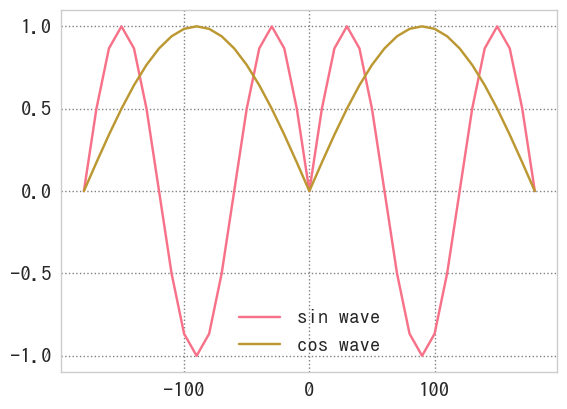

In [93]:
df.mirror().mirror(False).plot()

In [104]:
df.mirror().mirror(False)

,sin wave,cos wave
180,0.000000e+00,0.000000
170,5.000000e-01,0.173648
160,8.660254e-01,0.342020
150,1.000000e+00,0.500000
140,8.660254e-01,0.642788
130,5.000000e-01,0.766044
120,1.224647e-16,0.866025
110,-5.000000e-01,0.939693
100,-8.660254e-01,0.984808
90,-1.000000e+00,1.000000


cwでミラー化してからccwでミラー化すると変なことになります。

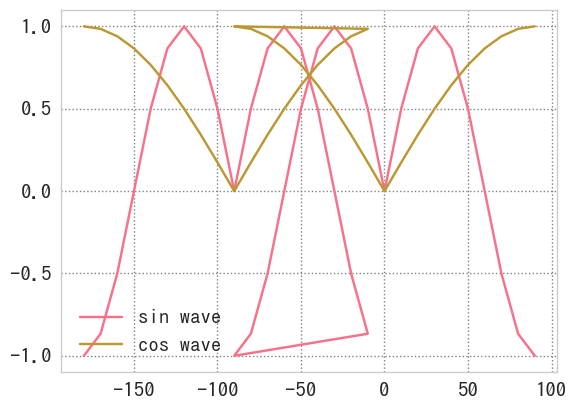

In [97]:
df.mirror(0).mirror(1).plot()

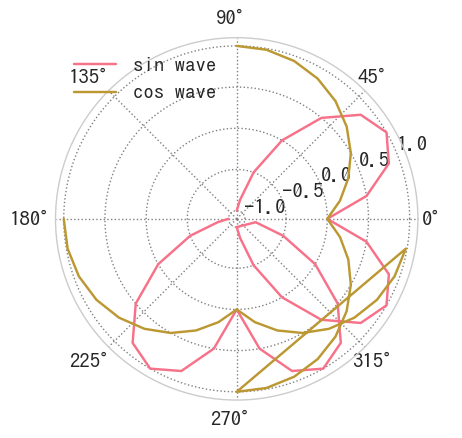

In [98]:
df.mirror(0).mirror(1).polarplot()

インデックスの割り振りがおかしいですね。
1象限のデータを4象限まで、インデックスを-180~180°まで増やしたいときは、`mirror()`の引数を1->0の順番で使いましょう。

In [105]:
df.mirror(0).mirror(1)

,sin wave,cos wave
90,-1.000000e+00,1.000000
80,-8.660254e-01,0.984808
70,-5.000000e-01,0.939693
60,1.224647e-16,0.866025
50,5.000000e-01,0.766044
40,8.660254e-01,0.642788
30,1.000000e+00,0.500000
20,8.660254e-01,0.342020
10,5.000000e-01,0.173648
0,0.000000e+00,0.000000


In [106]:
df.mirror(1).mirror(0)

,sin wave,cos wave
180,0.000000e+00,0.000000
170,5.000000e-01,0.173648
160,8.660254e-01,0.342020
150,1.000000e+00,0.500000
140,8.660254e-01,0.642788
130,5.000000e-01,0.766044
120,1.224647e-16,0.866025
110,-5.000000e-01,0.939693
100,-8.660254e-01,0.984808
90,-1.000000e+00,1.000000


## try

In [112]:
index

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
        10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
        11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
        12.6,  12.7,

In [141]:
np.random.seed(6)
index = np.linspace(0,90,19)
ar = np.random.randn(len(index)*3).reshape(-1,3)
sdf = pd.DataFrame(ar,index=index)
sdf.head().append(sdf.tail())

,0,1,2
0.0,-0.311784,0.729004,0.217821
5.0,-0.899092,-2.486781,0.913252
10.0,1.127064,-1.514093,1.639291
15.0,-0.429894,2.631281,0.601822
20.0,-0.335882,1.237738,0.111128
70.0,-0.780152,0.955610,-0.126736
75.0,-1.368613,1.218481,-0.857501
80.0,-0.561471,-1.033520,0.358771
85.0,1.073681,-0.375505,0.396368
90.0,-0.471446,2.336608,1.502786


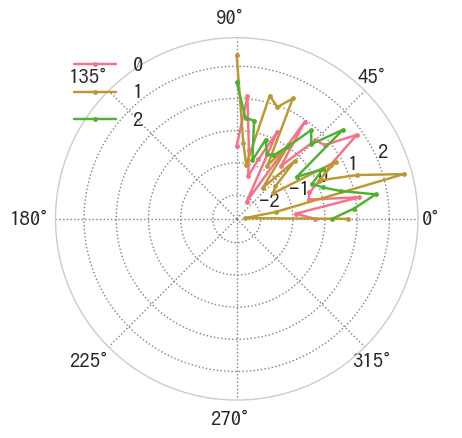

In [147]:
sdf.polarplot(style='.-')

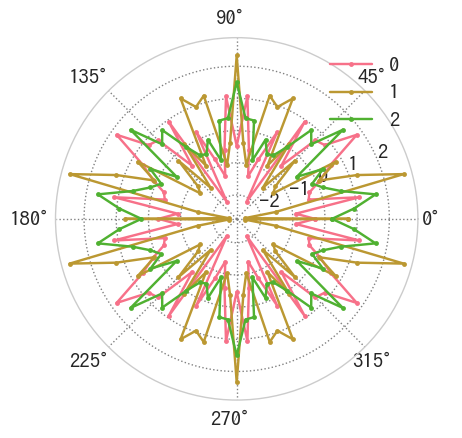

In [148]:
sdf.mirror().mirror().polarplot(style='.-')

In [149]:
sdf.mirror().mirror()sdf.mirror().mirror()

,0,1,2
0.0,-0.311784,0.729004,0.217821
5.0,-0.899092,-2.486781,0.913252
10.0,1.127064,-1.514093,1.639291
15.0,-0.429894,2.631281,0.601822
20.0,-0.335882,1.237738,0.111128
25.0,0.129151,0.076128,-0.155128
30.0,0.634225,0.810655,0.354809
35.0,1.812590,-1.356476,-0.463632
40.0,0.824654,-1.176431,1.564490
45.0,0.712705,-0.181007,0.534200


# ここから下もゴミ

0-90°まで1°刻みの角度をインデックスに取ったサンプルデータを作成します。

In [9]:
np.random.seed(6)  # ランダムステート固定
df = pd.DataFrame(np.random.randn(91*2).reshape(-1,2))
df.head().append(df.tail())  # 頭とお尻だけ表示

,0,1
0,-0.311784,0.729004
1,0.217821,-0.899092
2,-2.486781,0.913252
3,1.127064,-1.514093
4,1.639291,-0.429894
86,0.413563,-0.373377
87,-0.320166,-0.593196
88,-0.187657,-1.486392
89,0.611894,-0.269844
90,0.692493,0.961333


# 極座標プロット
`df.polarplot()`で極座標でプロットします。

極座標プロット関数を定義します。

polar()メソッドとして使用します。

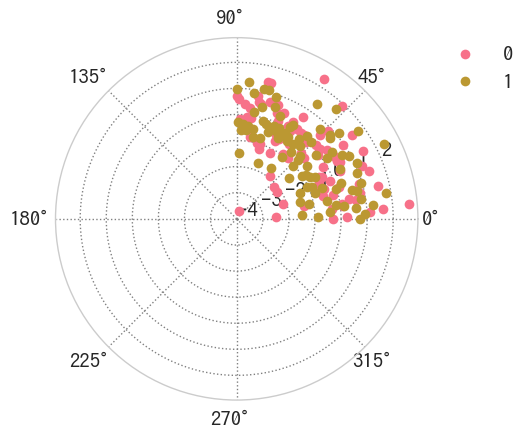

In [39]:
df.polarplot(style='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)  # 凡例外側

# 線対称にデータを拡大
90°, 180°までしかデータがなくても、`_mirror()`を定義して、メソッドとして実行すると`df.mirror()`で線対称にデータを追加できます

In [20]:
def _mirror(self):
    """Append reverse DataFrame"""
    return self.append(self.iloc[-2::-1], ignore_index=True)

pd.DataFrame.mirror = _mirror
pd.Series.mirror = _mirror

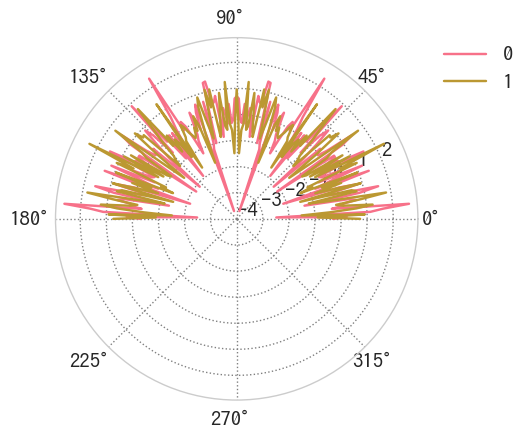

In [21]:
df.mirror().polarplot()  # 180°まで拡張
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)  # 凡例外側

このときのdfとdf.mirror()を比べてみると

In [22]:
df

,0,1
0,-0.311784,0.729004
1,0.217821,-0.899092
2,-2.486781,0.913252
3,1.127064,-1.514093
4,1.639291,-0.429894
5,2.631281,0.601822
6,-0.335882,1.237738
7,0.111128,0.129151
8,0.076128,-0.155128
9,0.634225,0.810655


In [11]:
df.mirror()

,0,1
0,-0.311784,0.729004
1,0.217821,-0.899092
2,-2.486781,0.913252
3,1.127064,-1.514093
4,1.639291,-0.429894
5,2.631281,0.601822
6,-0.335882,1.237738
7,0.111128,0.129151
8,0.076128,-0.155128
9,0.634225,0.810655


91ポイント目で切り返されていることがわかります。
91ポイント目の数値が2回続けて出現しないように、`mirror()`メソッドでは`iloc[-2::-1]`として一つデータを飛ばしています。

360°に線対称にとるときは、`mirror()`メソッドを2回続けて打ちましょう。

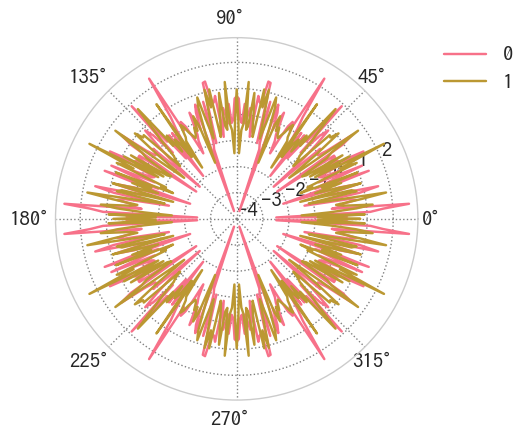

In [12]:
df.mirror().mirror().polarplot()  # 360°まで拡張
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)  # 凡例外側

mirror().mirror()した後のデータフレームは0-360度までのデータになっています。

In [13]:
df.mirror().mirror()

,0,1
0,-0.311784,0.729004
1,0.217821,-0.899092
2,-2.486781,0.913252
3,1.127064,-1.514093
4,1.639291,-0.429894
5,2.631281,0.601822
6,-0.335882,1.237738
7,0.111128,0.129151
8,0.076128,-0.155128
9,0.634225,0.810655


# インデックスが1°ごとではない場合
自分でindexを再設定する必要があります。
以下では`mirror()`メソッドの結果を別のデータフレームに格納して、そのindexを割り算して新たなindexとしています。

In [23]:
np.arange(0, 180, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170])

In [28]:
np.random.seed(6)  # ランダムステート固定
index = np.arange(0, 180, 10)
sr = pd.Series(np.random.randn(len(index)), index=index)
sr

0     -0.311784
10     0.729004
20     0.217821
30    -0.899092
40    -2.486781
50     0.913252
60     1.127064
70    -1.514093
80     1.639291
90    -0.429894
100    2.631281
110    0.601822
120   -0.335882
130    1.237738
140    0.111128
150    0.129151
160    0.076128
170   -0.155128
dtype: float64

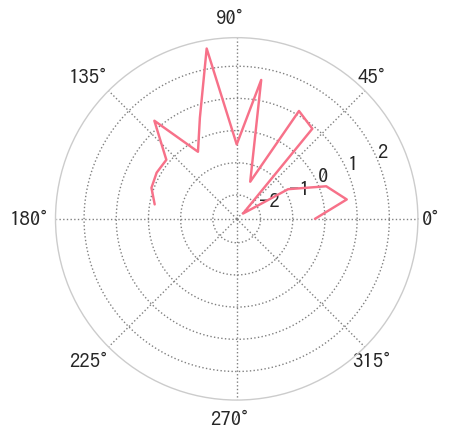

In [29]:
sr.polarplot()

# 少数

In [188]:
np.random.seed(6)  # ランダムステート固定
index = np.arange(0,90,.5)
sdf = pd.DataFrame(np.random.randn(90*2*2).reshape(-1,2), index=index)
sdf.head().append(sdf.tail())  # 頭とお尻だけ表示

,0,1
0.0,-0.311784,0.729004
0.5,0.217821,-0.899092
1.0,-2.486781,0.913252
1.5,1.127064,-1.514093
2.0,1.639291,-0.429894
87.5,0.396109,-0.664331
88.0,0.898677,-2.834576
88.5,0.981946,0.346269
89.0,1.144833,-1.078328
89.5,-0.159102,-0.992958


0-89.5まで0.5°ずつのインデックスが作成されます。

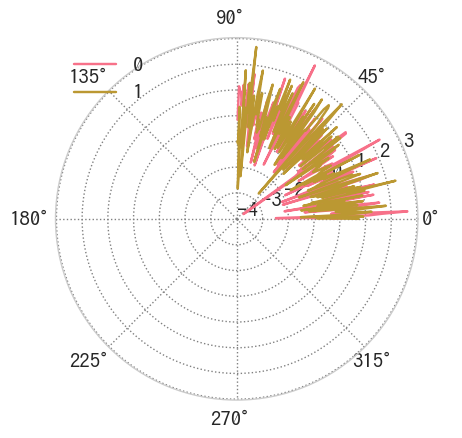

In [189]:
sdf.polarplot()

In [190]:
ssdf = sdf.mirror()
# index = np.arange(0,180,.5)
# sdf.index = index

In [196]:
# index = np.linspace(0,180,2*len(sdf)-1)
ssdf = sdf.mirror()
ssdf.index /= 2
ssdf

,0,1
0.0,-0.311784,0.729004
0.5,0.217821,-0.899092
1.0,-2.486781,0.913252
1.5,1.127064,-1.514093
2.0,1.639291,-0.429894
2.5,2.631281,0.601822
3.0,-0.335882,1.237738
3.5,0.111128,0.129151
4.0,0.076128,-0.155128
4.5,0.634225,0.810655


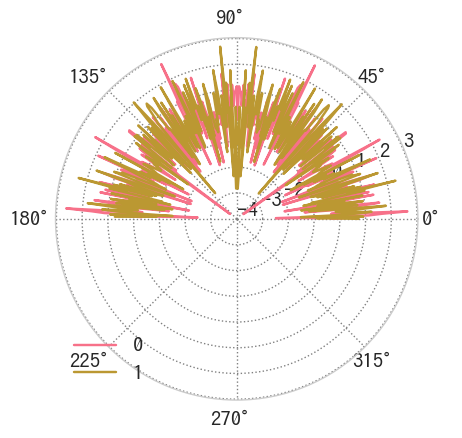

In [197]:
ssdf.polarplot()

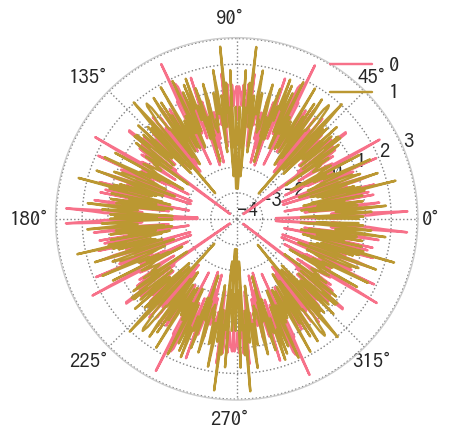

In [198]:
sssdf = sdf.mirror().mirror()
sssdf.index /= 2
sssdf.polarplot()

## mirrorメソッド改造

# タイトル: pandasを使って極座標プロット
極座標、ポーラーグラフ

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 400  # 最大表示行拡大

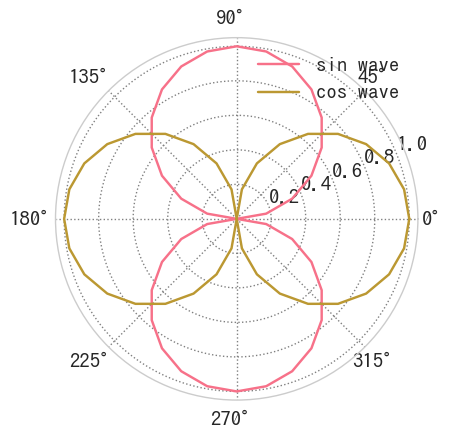

In [182]:
df.mirror()

|index |   0       |          |
|-----|-----------|----------|
|9.5  | -0.159102 	|-0.992958|
|90.0 	|0.588809 	|0.327953|
|-89.5 |	-0.159102| 	-0.992958|
|-89.0 |	1.144833 	|-1.078328|

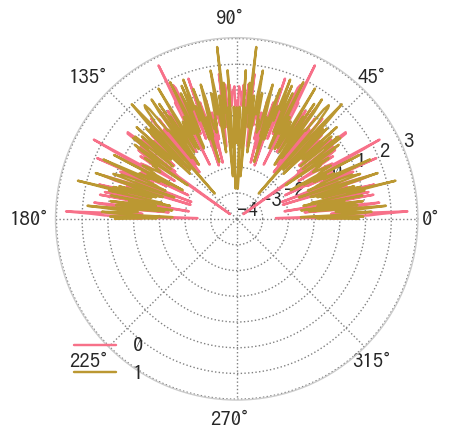

In [125]:
df.mirror(axis='y').polarplot()

`axis=None, axis='x', axis=0`は同じ意味で、水平線に対する鏡像が作られます。

`axis='y', axis=1`は同じ意味で、垂直線に対する鏡像が作られます。

この例では、`axis='y'`を設定したほうがうまく行きました。

データを一周にするには`mirror()`メソッドを二回続けて打ち込みます。

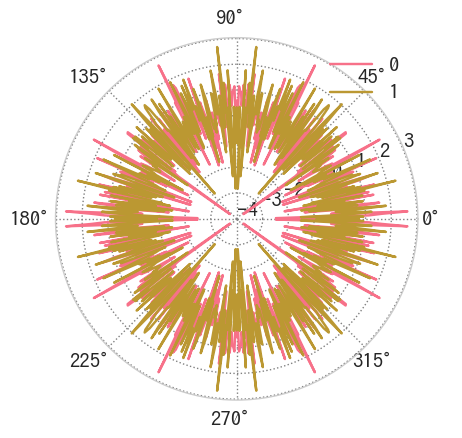

In [126]:
df.mirror(1).mirror(0).polarplot()

# まとめ
自作のpolar.pyを組み立てました。

In [ ]:
# %load polar.py
#!/usr/bin/env python
"""polar plot functions"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def _polarplot(df, **kwargs):
    """polar plot
    usage: df.polarplot()

    Same args with `df.plot()`
    """
    _df = df.copy()
    _df.index = _df.index * np.pi / 180  # ラジアン変換
    ax = plt.subplot(111, projection='polar')  # 極座標プロット
    ax = _df.plot(ax=ax, kind='line', **kwargs)
    return ax


def _mirror(self, ccw=False):
    """Make a mirror copy of DataFrame with respect to the line
    usage:
        df.mirror(ccw=False)...data increase to Clock Wise(cw)
        df.mirror(ccw=True)...data increase to Counter Clock Wise(ccw)
    args: ccw(bool) default False
    return: pandas.Series or pandas.DataFrame
    """
    copy_index = self.index
    if not ccw:  # data increase to Clock Wise(cw)
        mirror_df = self.append(self.iloc[-2::-1], ignore_index=True)
        new_index = np.r_[copy_index, copy_index[1:] + copy_index[-1]]
    else:  # data increase to Counter Clock Wise(ccw)
        mirror_df = self.iloc[::-1].append(self.iloc[1:], ignore_index=True)
        new_index = np.r_[copy_index[::-1], -copy_index[1:]]
    mirror_df.index = new_index  # reset index
    return mirror_df


# 関数のメソッド化
for cls in (pd.DataFrame, pd.Series):
    setattr(cls, 'mirror', _mirror)
    setattr(cls, 'polarplot', _polarplot)


# ごみ

In [154]:
sr.iloc[::-1].append(sr.iloc[1:])

180    0.634225
170   -0.155128
160    0.076128
150    0.129151
140    0.111128
130    1.237738
120   -0.335882
110    0.601822
100    2.631281
90    -0.429894
80     1.639291
70    -1.514093
60     1.127064
50     0.913252
40    -2.486781
30    -0.899092
20     0.217821
10     0.729004
0     -0.311784
10     0.729004
20     0.217821
30    -0.899092
40    -2.486781
50     0.913252
60     1.127064
70    -1.514093
80     1.639291
90    -0.429894
100    2.631281
110    0.601822
120   -0.335882
130    1.237738
140    0.111128
150    0.129151
160    0.076128
170   -0.155128
180    0.634225
dtype: float64

In [155]:
df.iloc[::-1].append(df.iloc[1:])

,sin wave,cos wave
90.0,1.000000,6.123234e-17
89.5,0.999962,8.726535e-03
89.0,0.999848,1.745241e-02
88.5,0.999657,2.617695e-02
88.0,0.999391,3.489950e-02
87.5,0.999048,4.361939e-02
87.0,0.998630,5.233596e-02
86.5,0.998135,6.104854e-02
86.0,0.997564,6.975647e-02
85.5,0.996917,7.845910e-02


In [156]:
df.mirror()

,sin wave,cos wave
0.0,0.000000,1.000000e+00
0.5,0.008727,9.999619e-01
1.0,0.017452,9.998477e-01
1.5,0.026177,9.996573e-01
2.0,0.034899,9.993908e-01
2.5,0.043619,9.990482e-01
3.0,0.052336,9.986295e-01
3.5,0.061049,9.981348e-01
4.0,0.069756,9.975641e-01
4.5,0.078459,9.969173e-01
